# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Regression is a supervised algorithm to make prediction based on continous y values.  

For example, given the following data:

| | Egg price  | Gold price    | Oil price   | GDP   |
|---:|:-------------|:-----------|:------|:------|
| 1 | 3  | 100       | 4   | 21   |
| 2 | 4  | 500    | 7   | 43     |

We want to use egg price, gold price and oil price to predict GDP.  We called egg price, gold price, oil price **features** or $\mathbf{X}$. We called what we want to predict **labels** or **targets** or $\mathbf{y}$.  Each row is called **sample**.  

### Course Notations and Terms

We shall use the following notations in our course.  

- $x_j^{(i)}$ represents the i-th sample, and j-th feature. For example, $x_1^{(1)}$ denote egg price of the first sample (i.e., 100), $x_2^{(1)}$ for gold price of the first sample (i.e., 4), and $x_3^{(1)}$ for oil price of the first sample (i.e., 21).  

- Bold captial $\mathbf{X}$ denotes the whole **matrix** of features with $m$ rows of samples and $n$ columns of features.  The **shape** of $X$ is $(m, n)$.  

- Bold lowercase $\mathbf{x}$ denotes the single **vector** (i.e., column) of feature.

- $y^{(i)}$ represents the **targets/labels** of the i-th sample, and $\mathbf{y}$ refers to the whole **vector** of targets with **shape** of $(m, )$


### Hypothesis Function

**Hypothesis function** maps given input $\mathbf{X}$ to predicted $\mathbf{y}$.  We must **learn**/**train** this function.  To differentiate between actual and predicted $\mathbf{y}$, we commonly called predicted $\mathbf{y}$ as $\hat{\mathbf{y}}$ (read as yhat).

For linear regression, the hypothesis function (denoted as $h_{\theta}(x)$) which means $h$ depends on $x$ parametized by $\theta$ is defined as followed.  

\begin{align*}
h_\theta(x) &= \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n \tag{A} \\
&= \sum_{i=0}^n \theta_ix_i  \tag{B} \\
&= \boldsymbol{\theta}^T \mathbf{x} \tag{C} \\
\mathbf{h} &= \mathbf{X}\boldsymbol{\theta} \tag{D}
\end{align*}

Here $\theta$ are called **parameters** or **weights** or **coefficients** that parameterize the linear mappings from $\mathbf{X}$ -> $\mathbf{y}$.  Also, we commonly don't write equations in the (A) form.  We called (B) form as the **summation** form, (C) as the **vectorized** form, and (D) as the **matrix** form which combines all samples.  We like to write as (D) because it's easy to implement.

The resulting hypothesis function is called **model**.  The process is called **training** the model.  The latter process of testing the model on test set is called **inference**.

### How to find the best $\theta$ ==> Gradient Descent

How do we learn the best parameters $\theta$?  

First, we must define a **loss/objective function** (denoted as $J$) that measures, for a given $\theta$, how close $h(\mathbf{x}^{(i)})$ are to the corresponding $\mathbf{y}^{(i)}$.  :

$$J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$$

We want to choose $\theta$ so as to minimize $J(\theta)$.  Such process is called **optimization**.

$$\theta^* = \argmin_\theta J(\theta)$$

One very successful optimization algorithm is called **gradient descent** algorithm, which is based on updating theta based on the **derivatives** (we also called **gradient**).   **Why gradient descent works?**  

This figure illustrates why:

<img width="400" src = "figures/gradient.png">

### Formal Definition

We start with some random $\theta$, and repeatedly performs the update:

$$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$

 
This update is simultaneously performed for all values of $j=0, 1, \cdots, n$ (if you forget, $j$ here refers to each feature :-).  Here, $\alpha$ is called the **learning rate**, ranging from 0 to 1.  Commonly, we tried 0.001 as default, and this value must be manually handpicked.  Any parameters such as learning rate are called **hyperparameters**.

In order to implement this algorithm, we have to find the **partial derivative of the loss function in respect to each $\theta_j$**.  Let's try the partial derivative of our loss function in respect to $\theta_j$.  Also, let's first work it out for only one training example first as follows:

$$
\begin{aligned}
\frac{\partial J}{\partial \theta_j} &= \frac{\partial}{\partial \theta_j} \frac{1}{2}(h_\theta(x) - y)^2 \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} (h_\theta(x) - y) \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} \big(\sum_{i=0}^n \theta_ix_i - y\big) \\
&= (h_\theta(x) - y)x_j \\
\end{aligned}
$$

<!-- This rule has several properties that seem natural and intuitive. For instance, the magnitude of the update is proportional to the **error** term $h_\theta(x) - y$; thus, for instance, if we are encountering a training example on which our prediction nearly matches the actual value of $y^{(i)}$, then we find that there is little need to change the parameters; in contrast, a larger change to the parameters will be made if our prediction has a large error (i.e., if it is very far from $y^{(i)}$).
 -->
 
To modify the update rule for whole training example, we revise the update rule to include the summation as

$$\theta_j := \theta_j - \alpha * \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \tag{for every $j$}$$  

or

$$\theta = \theta - \alpha * \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$

Since this gradient descent calculates gradient using every example in the entire training set, we called this as **batch gradient descent**.

Sometimes, performing batch gradient descent can be slow, thus we can use **stochastic gradient descent** which refers to looking at only one training example, where we can pick with or without replacement.  Here, **without replacement** refers to the process in which no same sample is used in the same **epoch**.  Here epoch means one  iteration which the whole training set is being exhausted.  Thus, in without replacement, we simply loop from $i =1$ to $m$ for one epoch.

$$ \theta_j := \theta_j - \alpha * ((h_\theta(x)^{(i)}-y^{(i)})x_j^{(i)}) \tag{for every $j$}$$

Although **stochastic gradient descent** may be faster, it rarely converges to the optimum given its randomness.  A middle ground is **mini-batch gradient descent** which can be expressed as

$$\theta_j := \theta_j - \alpha * \sum_{i=start}^{batchsize}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \tag{for every $j$}$$

Similarly, we can do this with or without replacement.  In without replacement, we simply chop evenly and exhaust the whole training set for one epoch.

## Implementation

The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m, )$
        - $\mathbf{w}$ -> $(n, )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the mean squared error
    $$J = \frac{(\mathbf{h}-\mathbf{y})^2}{2}$$
    where $\mathbf{h}$ is simply
    $$ \mathbf{h} = X\boldsymbol{\theta} $$
3. Calculate the gradient based on the loss
    - The gradient of the loss function is
    $$\frac{\partial J}{\partial \theta_j} = X^\top(\mathbf{h} - \mathbf{y})$$
4. Update the theta with this update rule
    $$\theta = \theta - \alpha * \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until `max_iter` is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

## Let's get our hands dirty!

## 1. Prepare data

### 1.1 Get your X and y in the right shape

In [2]:
# 1. Let's load some diabetes data 
# as our regression case study
from sklearn.datasets import load_diabetes
# type - Bunch
# Bunch - dictionary of numpy data
# diabetes.feature_names
# print(diabetes)
diabetes = load_diabetes()

print("Features: ", diabetes.feature_names)

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
X = diabetes.data
X.shape #number of samples, number of features

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

print(m, n)

442 10


In [4]:
y = diabetes.target

In [5]:
# number of rows in X is the same as number of rows in y
# because so we have yhat for all y
assert m == y.shape[0] 

### 1.2 Train test split your data

In [6]:
# what is the appropriate size for test data
# 70/30 (small dataset); 80/20 (medium dataset); 90/10 (large dataset);
# why large dataset, can set test size to 10, because
# 10% of large dataset is already enough for testing accuracy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

assert len(X_train)  == len(y_train)
assert len(X_test)   == len(y_test)

### 1.3 Feature scale your data to reach faster convergence

In [7]:
# I want to standardize my data so that mean is 0, variance is 1
# average across each feature, NOT across each sample
# Why we need to standardize
# Because standardizing usually allows us to reach convergence faster
# Why -> because the values are within smaller range
# Thus, the gradients are also within limited range, and NOT go crazy

from sklearn.preprocessing import StandardScaler

# 1. StandardScaler.fit(X)  #this scaler (or self) knows the mean and std so now
# it knows how to transform data
# 2  X = StandardScaler.transform(X)  #not in place; will return something

# 1. StandardScaler.fit_transform(X) -> 1 and 2 sequentially

# create an object of StandardScaler
# StandardScaler is a class
# scaler is called instance/object

# ALMOST always, feature scale your data using normalization or standardization
# If you assume your data is gaussian, use standardization, otherwise, you do the normalization

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Note: you MUST split first, before scale....if not, you will get data leakage

### 1.4 Add intercepts

In [8]:
# What is the shape of X they want
# (number of samples, number of features) --> correct shape
# How about the intercept
# w0 is OUR intercept
# what is the shape of w -->(n+1, )
# What is the shape of intercept --->(m, 1)
#X = [1 2 3     @  [w0
#     1 4 6         w1
#     1 9 1         w2 
#     1 10 2 ] 

# np.ones((shape))
intercept = np.ones((X_train.shape[0], 1))

# concatenate the intercept based on axis=1
X_train = np.concatenate((intercept, X_train), axis=1)

# np.ones((shape))
intercept = np.ones((X_test.shape[0], 1))

# concatenate the intercept based on axis=1
X_test = np.concatenate((intercept, X_test), axis=1)

### 1.5. Feature Engineering (optional)

It is sometimes useful to engineer new features (e.g., polynomial, kernels) so to create some non-linear relationships with your target.

Here we gonna skip

## Step 2: Fit your algorithm 

### 2.1 Define your algorithm

In [9]:
from time import time

# Step 1: Prepare your data
# X_train, X_test have intercepts that are being concatenated to the data
# [1, features
#  1, features....]

# making sure our X_train has same sample size as y_train
assert X_train.shape[0] == y_train.shape[0]

# initialize our w
# We don't have to do X.shape[1] + 1 because our X_train already has the
# intercept
# w = theta/beta/coefficients
theta = np.zeros(X_train.shape[1])

# define the learning rate
# later on, you gonna know that it should be better to make it slowly decreasing
# once we perform a lot of iterations, we want the update to slow down, so it converges better
alpha = 0.0001

# define our max_iter
# typical to call it epochs <---ml people likes to call it
max_iter = 1000

def h_theta(X, theta):
    return X @ theta

def mse(yhat, y):
    return ((yhat - y)**2).sum() / yhat.shape[0]

def gradient(X, error):
    return X.T @ error

start = time()

# define your for loop
for i in range(max_iter):
    
    # 1. yhat = X @ w
    # prediction
    # yhat (m, ) = (m, n) @ (n, )
    yhat = h_theta(X_train, theta)

    # 2. error = yhat - y_train
    # error for use to calculate gradients
    # error (m, ) = (m, ) - (m, )
    error = yhat - y_train

    # 3. grad = X.T @ error
    # grad (n, ) = (n, m) @ (m, )
    # grad for each feature j
    grad = gradient(X_train, error)

    # 4. w = w - alpha * grad
    # update w
    # w (n, ) = (n, ) - scalar * (n, )
    theta = theta - alpha * grad

time_taken = time() - start

## 2.2 Compute accuracy/loss

In [10]:
# we got our lovely w
# now it's time to check our accuracy
# 1. Make prediction
yhat = h_theta(X_test, theta)

# 2. Calculate mean squared errors
mse = mse(yhat, y_test)

# print the mse
print("MSE: ", mse)
print("Time used: ", time_taken)

MSE:  3122.312250500612
Time used:  0.007108211517333984


## Some graphs...

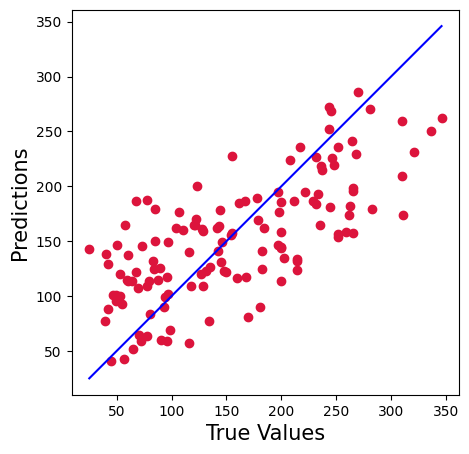

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_test, yhat, c='crimson')

p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Group Workshop - Check your understandings

Answer the following questions:

Instruction:  Gather in your group.  Will randomly pick groups to present.

1.  Using the table of egg price, gold price, etc., please do the followings:
    1.  Draw the vector $\mathbf{x}_2$
    2.  Draw the vector $\mathbf{x}^{(2)}$
    3.  What is $x^{(2)}_1$
    4.  What is $y^{(1)}$
    5.  Draw the vector $\mathbf{y}$
    6.  Draw the entire matrix $\mathbf{X}$
    7.  Create the vector $\mathbf{x}_2$ using numpy
    8.  Create the matrix $\mathbf{X}$ using numpy
2.  Given the first sample $\mathbf{x}^{(1)}$, and given a weight $\boldsymbol{\theta}$ of [2, 0.1, 3], what is $\hat{y}$? Show the calculation by hand.  (this is called *vectorized* form)
3.  Perform 2 using numpy
4.  Given the entire matrix $\mathbf{X}$, and using the same weight as above, what is $\hat{\mathbf{y}}$?  Show the calculation by hand.  This is called *matrix* form.
5.  Perform 4 using numpy
6.  Given the entire matrix $\mathbf{X}$, given a weight $\boldsymbol{\theta}$ of [2, 0.1, 3], and given the $\mathbf{y}$, what is $J(\theta)$? Show the calculation by hand.
7.  Perform 6 using numpy
8.  For training sample 1, i.e., $\mathbf{x}^{(1)}$, what is $\displaystyle \frac{\partial J}{\partial \theta_2}$  Show the calculation by hand.
9.  For all samples, i.e., $\mathbf{X}$, what is $\displaystyle \frac{\partial J}{\partial \theta_2}$  Show the calculation by hand.
10. For all samples, what is $\displaystyle \frac{\partial J}{\partial \theta}$.  Show the calculation by hand.
11. Given $\alpha = 0.01$, what is the new $\boldsymbol{\theta}$?
12. Prove that $\theta_j := \theta_j - \alpha * \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$ is same as $\theta = \theta - \alpha * \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$
13. In the beginning of gradient descent, what is the initial weight?
14. Review how to find derivatives/gradients, especially multiplication and chain rule by yourself.
15. Explain in your own words, why finding the derivatives can help you find the better weight.
16. Explain what is stochastic and mini-batch gradient descent.  (actually what you did in 8 is stochastic)
17. Now you have transcended.  Go to the code and understand everything :-)
